In [7]:
!kaggle datasets download -d arjuntejaswi/plant-village

Dataset URL: https://www.kaggle.com/datasets/arjuntejaswi/plant-village
License(s): unknown
 99% 324M/329M [00:09<00:00, 36.3MB/s]
100% 329M/329M [00:09<00:00, 35.9MB/s]


In [8]:
import zipfile
with zipfile.ZipFile("plant-village.zip", 'r') as zip_ref:
    zip_ref.extractall("plant-village")

In [9]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [10]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3

In [11]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/potato",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [12]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [13]:
len(dataset)

68

In [14]:
print(68*32) #total files 32-batch size

2176


In [15]:
for image_batch , label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch)


(32, 256, 256, 3)
tf.Tensor([1 1 1 0 2 0 0 0 0 1 1 0 0 1 1 0 0 2 0 0 0 0 1 0 1 0 1 1 1 1 2 1], shape=(32,), dtype=int32)


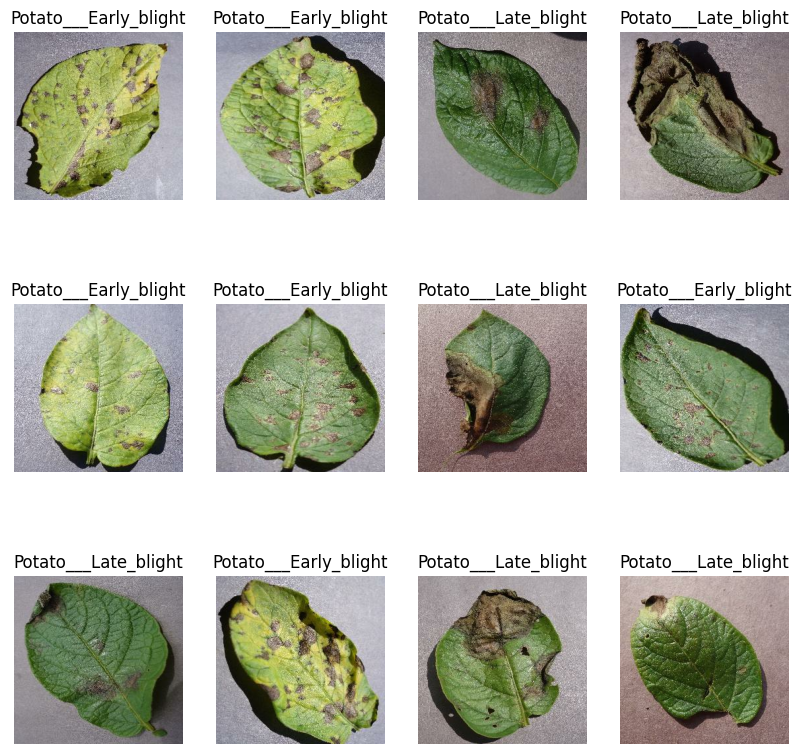

In [16]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.axis("off")
    plt.title(class_names[label_batch[i]])

In [17]:
train_Size=0.8
len(dataset)*train_Size

54.400000000000006

In [18]:
train_ds=dataset.take(54)
len(train_ds)

54

In [19]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [20]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [21]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [22]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [23]:
train_ds.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
val_ds.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
test_ds.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [24]:
resize_and_rescale=tf.keras.Sequential([layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
                                        layers.experimental.preprocessing.Rescaling(1.0/255)])

In [25]:
data_augmentation=tf.keras.Sequential([layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
                                    layers.experimental.preprocessing.RandomRotation(0.2)])

In [26]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS);
n_classes=3;

In [27]:
model=models.Sequential([resize_and_rescale,data_augmentation,layers.Conv2D(32,(3,3),activation="relu",input_shape=input_shape),layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,kernel_size=(3,3),activation="relu"),layers.MaxPooling2D((2,2)),  layers.Conv2D(64,kernel_size=(3,3),activation="relu") ,layers.MaxPooling2D((2,2)),layers.Conv2D(64,kernel_size=(3,3),activation="relu") , layers.MaxPooling2D((2,2)), layers.Conv2D(64,kernel_size=(3,3),activation="relu"),layers.MaxPooling2D((2,2)),layers.Conv2D(64,kernel_size=(3,3),activation="relu"),layers.MaxPooling2D((2,2)),layers.Flatten(),layers.Dense(64,activation="relu"),layers.Dense(n_classes,activation="softmax"),           ])
model.build(input_shape=input_shape)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [28]:
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=["accuracy"])


In [29]:
history=model.fit(train_ds,epochs=50,batch_size=BATCH_SIZE,verbose=1,validation_data=val_ds)

Epoch 1/50
54/54 [==============================] - 14s 100ms/step - loss: 0.8558 - accuracy: 0.5723 - val_loss: 0.7240 - val_accuracy: 0.6615
Epoch 2/50
54/54 [==============================] - 8s 135ms/step - loss: 0.5172 - accuracy: 0.7859 - val_loss: 0.7575 - val_accuracy: 0.7344
Epoch 3/50
54/54 [==============================] - 5s 96ms/step - loss: 0.4522 - accuracy: 0.8079 - val_loss: 0.2857 - val_accuracy: 0.8750
Epoch 4/50
54/54 [==============================] - 5s 94ms/step - loss: 0.2513 - accuracy: 0.8958 - val_loss: 0.2905 - val_accuracy: 0.8906
Epoch 5/50
54/54 [==============================] - 5s 84ms/step - loss: 0.2574 - accuracy: 0.8970 - val_loss: 0.3375 - val_accuracy: 0.8594
Epoch 6/50
54/54 [==============================] - 5s 94ms/step - loss: 0.2650 - accuracy: 0.8918 - val_loss: 0.2267 - val_accuracy: 0.9010
Epoch 7/50
54/54 [==============================] - 6s 109ms/step - loss: 0.2034 - accuracy: 0.9184 - val_loss: 0.1724 - val_accuracy: 0.9427
Epoch 8/5

In [30]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 3s 81ms/step - loss: 0.2464 - accuracy: 0.9440


In [31]:
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
loss=history.history["loss"]
val_loss=history.history["val_loss"]

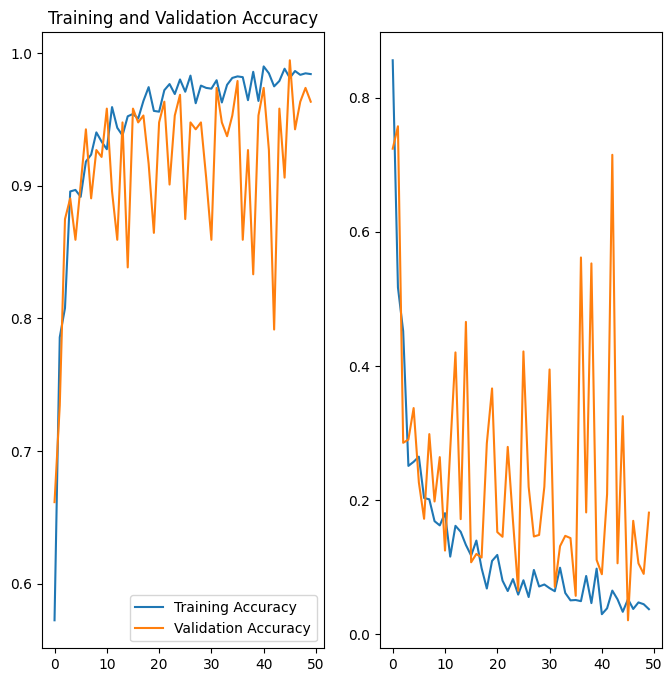

In [33]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(50),acc,label="Training Accuracy")
plt.plot(range(50),val_acc,label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(50),loss,label="Training Loss")
plt.plot(range(50),val_loss,label="Validation Loss")

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    '/content/potato',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    '/content/potato',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

# Model Definition
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=25)

# Evaluate Model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

# Save Model
model.save('cnn_model.h5')


Found 1722 images belonging to 3 classes.
Found 430 images belonging to 3 classes.
Epoch 1/25
53/53 [==============================] - 9s 104ms/step - loss: 0.8725 - accuracy: 0.5675 - val_loss: 0.7481 - val_accuracy: 0.7308
Epoch 2/25
53/53 [==============================] - 4s 79ms/step - loss: 0.5871 - accuracy: 0.7789 - val_loss: 0.4336 - val_accuracy: 0.8558
Epoch 3/25
53/53 [==============================] - 6s 108ms/step - loss: 0.4096 - accuracy: 0.8473 - val_loss: 0.3648 - val_accuracy: 0.8486
Epoch 4/25
53/53 [==============================] - 5s 88ms/step - loss: 0.3990 - accuracy: 0.8337 - val_loss: 0.3366 - val_accuracy: 0.8654
Epoch 5/25
53/53 [==============================] - 6s 121ms/step - loss: 0.2976 - accuracy: 0.8728 - val_loss: 0.2017 - val_accuracy: 0.9038
Epoch 6/25
53/53 [==============================] - 5s 88ms/step - loss: 0.2739 - accuracy: 0.8911 - val_loss: 0.2606 - val_accuracy: 0.9279
Epoch 7/25
53/53 [==============================] - 6s 111ms/step - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
class_labels = list(train_generator.class_indices.keys())
class_labels

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [39]:

import numpy as np
from tensorflow.keras.preprocessing import image


In [40]:
img_path = '/content/img.png'
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Rescale to [0, 1] range

In [41]:
predictions = model.predict(img_array)

1/1 [==============================] - 0s 306ms/step


In [42]:
predictions

array([[1.0000000e+00, 9.1388153e-10, 2.0194586e-26]], dtype=float32)

In [43]:
predicted_class_index = np.argmax(predictions, axis=1)[0]
predicted_class_label = class_labels[predicted_class_index]

print(f'The predicted class is: {predicted_class_label}')

The predicted class is: Potato___Early_blight
